<a href="https://colab.research.google.com/github/rodrigoyujisato/statistics/blob/main/factor_analysis_varimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/tutorial/introduction-factor-analysis

In [67]:
# !pip install factor_analyzer
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# ! pip install pingouin
import pingouin as pg
# ! pip install bioinfokit
from bioinfokit.analys import stat

In [12]:
data = pd.read_csv("clean.csv", delimiter= ';', decimal=",")
data = data.astype(float)
data.drop(['id','tempo','area','A1','A2','A3','A4','A5','A6','A7','A8','A9'],axis=1,inplace=True)
data

,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23
0,4.0,3.0,3.0,2.0,5.0,2.0,3.0,2.0,2.0,5.0,3.0,3.0,3.0,3.0
1,5.0,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,5.0,5.0,3.0,3.0,5.0
2,4.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0
3,5.0,5.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,5.0,5.0,4.0,5.0,2.0,5.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0
124,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0
125,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,1.0,3.0
126,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,2.0,3.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A10     128 non-null    float64
 1   A11     128 non-null    float64
 2   A12     128 non-null    float64
 3   A13     128 non-null    float64
 4   A14     128 non-null    float64
 5   A15     128 non-null    float64
 6   A16     128 non-null    float64
 7   A17     128 non-null    float64
 8   A18     128 non-null    float64
 9   A19     128 non-null    float64
 10  A20     128 non-null    float64
 11  A21     128 non-null    float64
 12  A22     128 non-null    float64
 13  A23     128 non-null    float64
dtypes: float64(14)
memory usage: 14.1 KB


In [14]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(447.058360659338, 2.0592082841633175e-48)

In [22]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
kmo_model

0.5776924257902982

In [23]:
fa = FactorAnalyzer(rotation='varimax')
fa.fit(data)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values
vectors

array([ 2.33113943,  1.754699  ,  0.90830824,  0.44356969,  0.35792351,
        0.31678789,  0.17728043,  0.10364604, -0.07322984, -0.14986938,
       -0.17101791, -0.22829919, -0.37593997, -0.40085238])

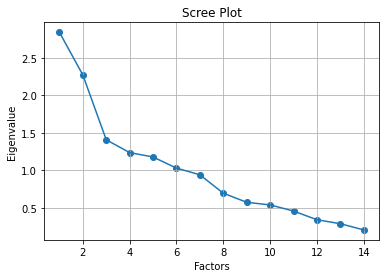

In [24]:
plt.scatter(range(1,data.shape[1]+1),eigen_values)
plt.plot(range(1,data.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [25]:
fa = FactorAnalyzer(bounds=(0.005, 1), impute='drop', is_corr_matrix=False,
        method='minres', n_factors=3, rotation='varimax',use_smc=True)
fa.fit(data)
lo = fa.loadings_
co = fa.corr_
rm = fa.rotation_matrix_

In [ ]:
lo

array([[ 0.032006  ,  0.15615408, -0.00230642],
       [ 0.04581453,  0.14085574,  0.08626857],
       [ 0.01095691,  0.35376556,  0.13259311],
       [-0.07451943,  0.35209052,  0.31219619],
       [-0.12380524,  0.30715405,  0.28615935],
       [-0.10864879,  0.79682066,  0.07291867],
       [-0.02754292,  0.65660782,  0.12657476],
       [-0.00103532,  0.28226924,  0.59631415],
       [ 0.02179674,  0.15009192,  0.85580845],
       [ 0.3732556 , -0.11895491,  0.14242502],
       [ 0.51937206, -0.0118271 ,  0.16815453],
       [ 0.53691153,  0.00200559, -0.03093465],
       [ 0.7756686 ,  0.18959337, -0.35014586],
       [ 0.69180116,  0.08480093, -0.28314982]])

In [26]:
co

array([[ 1.00000000e+00,  1.39776136e-01,  3.46519662e-02,
         1.43457863e-01,  4.02165372e-02,  2.18373716e-01,
        -3.23779623e-02,  6.27661963e-02, -4.48528569e-02,
         8.90304317e-02, -8.89845048e-02,  1.88764640e-01,
        -3.17930321e-02,  4.06330129e-02],
       [ 1.39776136e-01,  1.00000000e+00,  2.92054247e-01,
         3.89517405e-02,  1.02734766e-01,  7.91025295e-02,
         3.84073182e-02,  3.71754572e-02,  6.78288451e-02,
        -1.19691450e-03,  1.27159341e-01,  2.07496690e-02,
        -2.89862924e-02,  1.56476757e-02],
       [ 3.46519662e-02,  2.92054247e-01,  1.00000000e+00,
         3.36472014e-01,  4.98600741e-02,  1.92294985e-01,
         3.08845639e-01,  6.62804732e-02,  1.87637983e-01,
        -4.13299193e-02,  9.65024413e-02, -1.29651308e-01,
         5.86144619e-02,  2.13424731e-04],
       [ 1.43457863e-01,  3.89517405e-02,  3.36472014e-01,
         1.00000000e+00,  1.23523080e-01,  3.10782079e-01,
         1.89618140e-01,  3.14123933e-01,  3.

In [29]:
arr = np.asarray(lo)
np.savetxt('clean_result.csv',arr, delimiter=";", fmt='%1.4f')   
arr

array([[ 0.032006  ,  0.15615408, -0.00230642],
       [ 0.04581453,  0.14085574,  0.08626857],
       [ 0.01095691,  0.35376556,  0.13259311],
       [-0.07451943,  0.35209052,  0.31219619],
       [-0.12380524,  0.30715405,  0.28615935],
       [-0.10864879,  0.79682066,  0.07291867],
       [-0.02754292,  0.65660782,  0.12657476],
       [-0.00103532,  0.28226924,  0.59631415],
       [ 0.02179674,  0.15009192,  0.85580845],
       [ 0.3732556 , -0.11895491,  0.14242502],
       [ 0.51937206, -0.0118271 ,  0.16815453],
       [ 0.53691153,  0.00200559, -0.03093465],
       [ 0.7756686 ,  0.18959337, -0.35014586],
       [ 0.69180116,  0.08480093, -0.28314982]])

In [30]:
fa.get_factor_variance()

(array([1.81475533, 1.61337738, 1.56601287]),
 array([0.12962538, 0.11524124, 0.11185806]),
 array([0.12962538, 0.24486662, 0.35672468]))

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.0% of the points cannot be placed; y

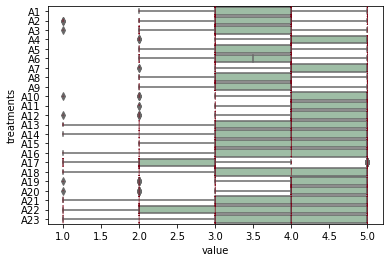

In [72]:
df = pd.read_csv("clean.csv", delimiter= ';', decimal=",")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['area'], value_vars=[
'A1',
'A2',
'A3',
'A4',
'A5',
'A6',
'A7',
'A8',
'A9',
'A10',
'A11',
'A12',
'A13',
'A14',
'A15',
'A16',
'A17',
'A18',
'A19',
'A20',
'A21',
'A22',
'A23'
])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments

ax = sns.boxplot(y='treatments', x='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(y="treatments", x="value", data=df_melt, color='#7d0013', size=1)
plt.show()

In [44]:

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A1'], df['A2'], df['A3'], df['A4'], df['A5'], df['A6'], df['A7'], df['A8'], df['A9'])
print(fvalue, pvalue)


19.68818482705646 5.271337229548088e-28


In [69]:
print(df_melt)

      index variavel  valor
0         2       A1      4
1        18       A1      3
2        14       A1      5
3        19       A1      4
4         6       A1      4
...     ...      ...    ...
2939     13      A23      4
2940     14      A23      2
2941     14      A23      3
2942      4      A23      3
2943     14      A23      5

[2944 rows x 3 columns]


In [73]:
#Anova using pingouin

aov = pg.anova(dv='value', between='treatments', data=df_melt, detailed=True)
aov.round(3)

# for i in range(1, 24):
#     print(f"Anova: tempo ~ A{i}")
#     aov = pg.anova(dv='area', between=f'A{i}', data=df, detailed=True)
#     print(aov.round(3))

,Source,SS,DF,MS,F,p-unc,np2
0,treatments,418.726,22,19.033,19.726,0.0,0.129
1,Within,2818.312,2921,0.965,NaN,NaN,NaN


In [74]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

# Note: p-value 0.001 from tukey_hsd output should be interpreted as <=0.001

/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A1,A2,0.218750,-0.225637,0.663137,2.519557,0.900000
1,A1,A3,0.726562,0.282176,1.170949,8.368530,0.001000
2,A1,A4,0.171875,-0.272512,0.616262,1.979652,0.900000
3,A1,A5,0.015625,-0.428762,0.460012,0.179968,0.900000
4,A1,A6,0.406250,-0.038137,0.850637,4.679178,0.128108
...,...,...,...,...,...,...,...
248,A20,A22,0.695312,0.250926,1.139699,8.008593,0.001000
249,A20,A23,0.695312,0.250926,1.139699,8.008593,0.001000
250,A21,A22,0.195312,-0.249074,0.639699,2.249605,0.900000
251,A21,A23,0.195312,-0.249074,0.639699,2.249605,0.900000


<AxesSubplot:xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

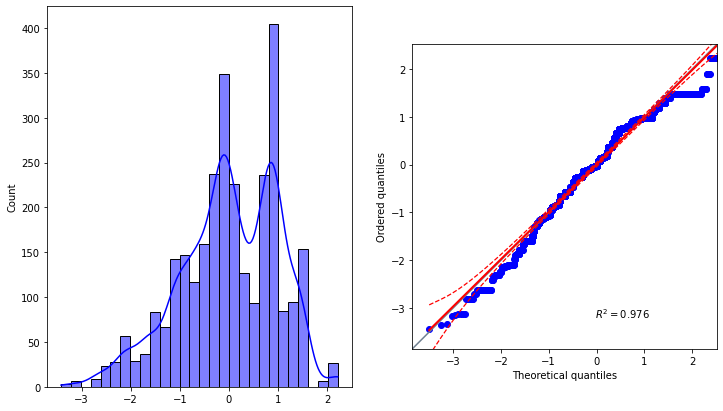

In [75]:
# To check the assumption of normality

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(res.anova_std_residuals,kde=True, color ='blue',ax=ax[0])
pg.qqplot(res.anova_std_residuals, dist='norm', ax=ax[1])

In [76]:
# Statistical normality test (D Agostino K square test)

pg.normality(res.anova_std_residuals, method='normaltest')

,W,pval,normal
0,101.698058,8.251775e-23,False


In [78]:
# To check the assumption on homogenetiy of variance

res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),15.4379
1,Degrees of freedom (Df),22.0000
2,p value,0.0000
